In [1]:
import os
import requests
from bs4 import BeautifulSoup
import re
from PIL import Image, ImageFile
import io
from io import BytesIO

from time import sleep

from PIL import Image

import urllib3
urllib3.disable_warnings()

In [2]:
headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; rv:45.0) Gecko/20100101 Firefox/45.0'
      }

base_url = "https://tekstpesni.ru"
artist = ["kaleo"]#,"Lady+Gaga"]

In [3]:
carl_url = []
for i in artist:
    url = f"{base_url}/search?q={i}"
    response = requests.get(url,headers=headers,verify=False)
    soup = BeautifulSoup(response.text, 'html.parser')
    data = soup.find_all('a',class_="link-primary link-offset-1 link-offset-1-hover link-underline link-underline-opacity-0 link-underline-opacity-75-hover")
    for i in data:
        song_url = i.get("href")
        carl_url.append(f"{base_url}{song_url}")
print(carl_url)

['https://tekstpesni.ru/song/804934/i-walk-on-water', 'https://tekstpesni.ru/song/804933/into-my-mothers-arms', 'https://tekstpesni.ru/song/804932/my-fair-lady', 'https://tekstpesni.ru/song/804931/hey-gringo', 'https://tekstpesni.ru/song/804930/free-the-slave', 'https://tekstpesni.ru/song/804929/brother-run-fast', 'https://tekstpesni.ru/song/804928/skinny', 'https://tekstpesni.ru/song/804927/break-my-baby-stripped-back', 'https://tekstpesni.ru/song/804926/backbone', 'https://tekstpesni.ru/song/804925/alter-ego', 'https://tekstpesni.ru/song/804924/break-my-baby', 'https://tekstpesni.ru/song/804923/i-want-more', 'https://tekstpesni.ru/song/804922/save-yourself', 'https://tekstpesni.ru/song/804921/hot-blood', 'https://tekstpesni.ru/song/804920/glass-house', 'https://tekstpesni.ru/song/804919/broken-bones', 'https://tekstpesni.ru/song/804918/vor-i-vaglaskogi', 'https://tekstpesni.ru/song/804917/no-good', 'https://tekstpesni.ru/song/804916/way-down-we-go', 'https://tekstpesni.ru/song/53337/

Имя исполнителя: 

KALEO

Название песни: I Walk on Water
"I, I walk on water
high above all beneath.
Fly, before I could tell you
Ohh that I, I walk on water
I walk on water
thrive as long as you can.
Goodbye to all my worries
Ohh 'cause I, I walk on water
Put your trust in me, put your trust in me
Put your trust in me, put your trust in me
I walk on water
I feel stronger, I feel stronger than I used to.
My feet, my feet don't touch the ground.
I don't worry, I don't worry any longer.
When your heart dies, your soul cries out for more.
She said walk on, walk on to the water.
I went further, I went further than before.
We don't need to have fear of going under.
Because I can hold you now, anytime.
Put your trust in me, put your trust in me
I put my trust in you, put my trust in you.
I walk on water
(I put my trust in you, put my trust in you)
(I walk on water)
(I put my trust in you, put my trust in you)
(I walk on water)
(I put my trust in you, put my trust in you)
(I walk on water)
B

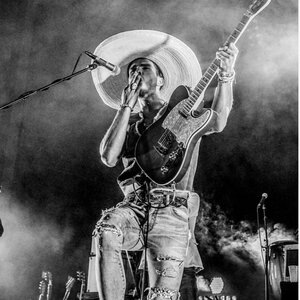

Имя исполнителя: 

KALEO

Название песни: Into My Mother's Arms
"Some days I can’t face the world outside
I fall straight into my mothers’s arms
Oh and some days it feels like no one’s on my side
Then I look into my mother’s eyes
Into my mother’s arms
Oh, just feels like a child
Just like a child
Into my mother’s arms, where I
Where I shall belong
Where I won’t be home
Mh, some say, «If you never have to hide
If you just live within the line you draw»
But I know, if you take away the light
If you take away the light, it’s all dark, is it not?
Ooo, into my mother’s arms
Oh, just, just like a child, no
Just like a child, no
Into my mother’s arms
Where I, I don’t have to hide
And show my mother’s eyes
Mh, say «Hush child, lay your worries off the side
'Cause you rest into your mother’s arms»" 


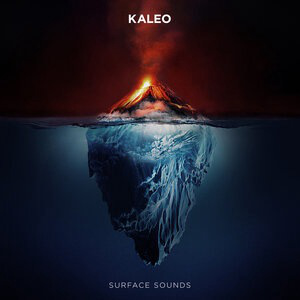

Имя исполнителя: 

KALEO

Название песни: My Fair Lady
"I'm weary from my travels
I've come a long, long way
I haven't felt a woman
Since last that I was here
Oh, won't you bring me whiskey
And run your fingers through my hair?
Oh, won't you whisper sweet words
Oh, so softly in my ears?
Can you always tell a sinner
From a saint, if he's the same?
And is your thick skin growing thinner?
Have you found someone to blame?
She said, &quot;You need not worry, child
Now is not the time&quot;
Then she kissed me on the forehead
And turned my water into wine
My fair lady
My fair lady
Just let me hold you for a while
Just let me hold you for a while
My fair lady
My fair lady
Just let me hold you for a while
Just let me hold you for a while
Keep lookin' out your window
When the storms are raging on
Oh-oh, before you know, gal
I'll be coming back ashore
Coming back to my hometown
Where I saw you first
I knew you were the one
I knew it all along
Go on, claim my heart
Some night you just seem forever

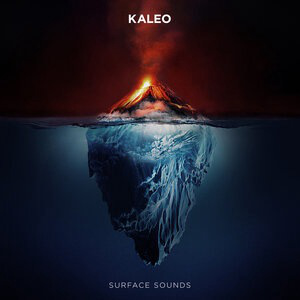

In [4]:
count = 0
for i_url in carl_url:
    if count >= 3:
        break
    else:  
        sleep(5)
        count += 1
        response = requests.get(i_url,headers=headers,verify=False)
        soup = BeautifulSoup(response.text, 'html.parser')
        
        link = soup.find('a', class_='d-inline-flex align-items-center gap-1 me-2 link-primary link-offset-1 link-offset-1-hover link-underline link-underline-opacity-0 link-underline-opacity-75-hover')
        artist_name = link.text
        print("Имя исполнителя:",artist_name)

        link = soup.find('h1')
        song_title = link.text
        print("Название песни:",song_title)

        lyrics = soup.find('meta', itemprop="description")
        lyrics = str(lyrics).replace('<meta content=','').replace('itemprop="description"/>','')
        print(lyrics)
        
        
        results_3 = soup.find('img',class_= "rounded border").get("src")
        url_img = f"{base_url}{results_3}"
        response = requests.get(url_img,headers=headers,verify=False)
        img = Image.open(io.BytesIO(response.content))
        display(img)
        #Сохранение изображений в папку
        image_filename = os.path.join('images', f'{song_title}.jpg')
        with open(image_filename, 'wb') as img_file:
            img_file.write(response.content)
            